# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

c:\Users\stijn\AppData\Local\Programs\Python\Python312\Lib\site-packages\mesa\time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Agent 0 has friends [1, 49, 48, 22, 28]
Agent 1 has friends [0, 3, 41, 23]
Agent 2 has friends [3, 40, 41, 37]
Agent 3 has friends [2, 4, 1, 5, 19, 45]
Agent 4 has friends [3, 11, 9]
Agent 5 has friends [6, 3, 7, 34]
Agent 6 has friends [5, 7, 8]
Agent 7 has friends [6, 5, 9, 31]
Agent 8 has friends [9, 6, 10]
Agent 9 has friends [8, 10, 7, 27, 4, 43]
Agent 10 has friends [9, 11, 8, 12, 28, 29]
Agent 11 has friends [10, 12, 4, 36, 25]
Agent 12 has friends [11, 13, 10, 14, 16, 22]
Agent 13 has friends [12, 14, 15]
Agent 14 has friends [13, 15, 12, 16, 46]
Agent 15 has friends [14, 16, 13, 31]
Agent 16 has friends [15, 14, 18, 12]
Agent 17 has friends [18, 19]
Agent 18 has friends [17, 16, 48, 29]
Agent 19 has friends [20, 17, 3]
Agent 20 has friends [19, 21, 22]
Agent 21 has friends [20, 22, 23, 28]
Agent 22 has friends [21, 20, 0, 12]
Agent 23 has friends [21, 25, 1, 38]
Agent 24 has friends [26, 48, 30, 47]
Agent 25 has friends [26, 23, 27, 11]
Agent 26 has friends [25, 27, 24, 28]
Ag

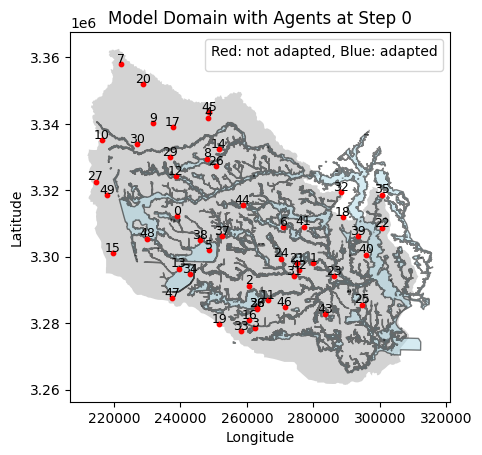

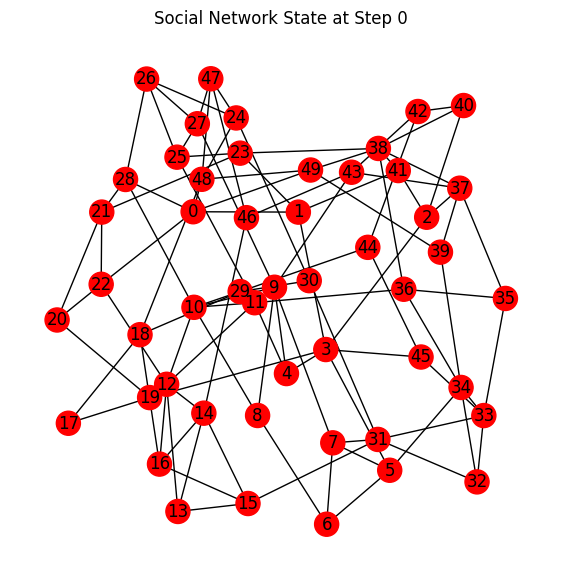

At step: 1 agent 0 has belief: 0.6739654553456047
Friend 1 has belief 0.6323509396823658
Friend 49 has belief 0
Friend 48 has belief 0.852154180824131
Friend 22 has belief 0.49754107106983364
Friend 28 has belief 0.5173294722881616
At step: 1 agent 1 has belief: 0.6388052464295771
Friend 0 has belief 0.6739654553456047
Friend 3 has belief 0.6539149236132678
Friend 41 has belief 0.5162806760706036
Friend 23 has belief 0.8323918079730371
At step: 1 agent 2 has belief: 0.6985879611862121
Friend 3 has belief 0.6539149236132678
Friend 40 has belief 0.5915725501814663
Friend 41 has belief 0.5162806760706036
Friend 37 has belief 0.8450545820307187
At step: 1 agent 3 has belief: 0.674128141651713
Friend 2 has belief 0.6985879611862121
Friend 4 has belief 0.7482938524960707
Friend 1 has belief 0.6388052464295771
Friend 5 has belief 0.7236181534124657
Friend 19 has belief 0.5033213431746482
Friend 45 has belief 0
At step: 1 agent 4 has belief: 0.72303798773497
Friend 3 has belief 0.6741281416517

<Figure size 1000x600 with 0 Axes>

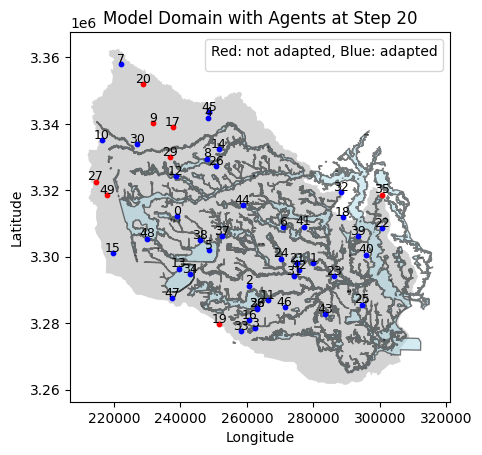

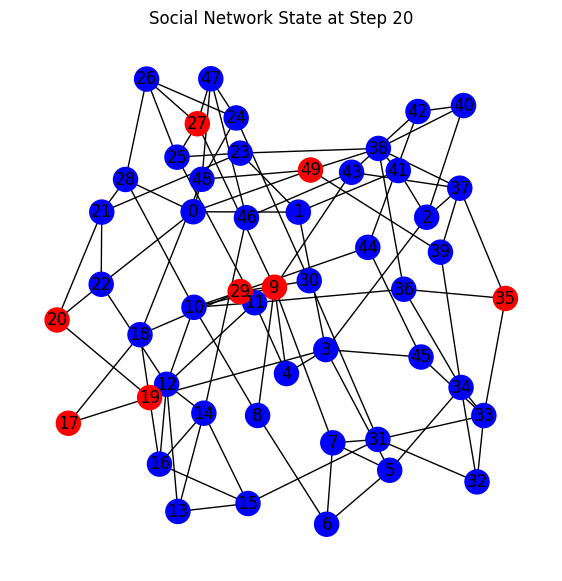

  0%|          | 0/1 [00:00<?, ?it/s]

Agent 0 has friends [24, 2, 23, 4]
Agent 1 has friends [3, 24, 5, 8, 21]
Agent 2 has friends [0, 16, 9]
Agent 3 has friends [1, 5, 7]
Agent 4 has friends [5, 0, 9]
Agent 5 has friends [4, 3, 1, 20, 6]
Agent 6 has friends [7, 8, 19, 5, 14]
Agent 7 has friends [6, 8, 9, 3]
Agent 8 has friends [7, 6, 1, 11, 15, 9]
Agent 9 has friends [10, 7, 12, 2, 4, 8]
Agent 10 has friends [9, 11, 12]
Agent 11 has friends [10, 13, 8, 16, 22]
Agent 12 has friends [10, 14, 9, 15]
Agent 13 has friends [11, 15, 24, 19]
Agent 14 has friends [15, 12, 6]
Agent 15 has friends [14, 16, 13, 8, 12]
Agent 16 has friends [15, 18, 2, 11]
Agent 17 has friends [19, 23]
Agent 18 has friends [19, 16, 20]
Agent 19 has friends [18, 17, 6, 13]
Agent 20 has friends [21, 18, 22, 5]
Agent 21 has friends [20, 22, 1]
Agent 22 has friends [21, 20, 24, 11]
Agent 23 has friends [24, 0, 17]
Agent 24 has friends [23, 0, 22, 1, 13]

Weights of agent 0: {'friend 24': 0.0, 'friend 2': 0.09119384917415811, 'friend 23': 1.0, 'friend 4': 0

[Text(0.5, 0, 'Step'),
 Text(0, 0.5, "Agent's belief"),
 Text(0.5, 1.0, "Agents' belief through time")]

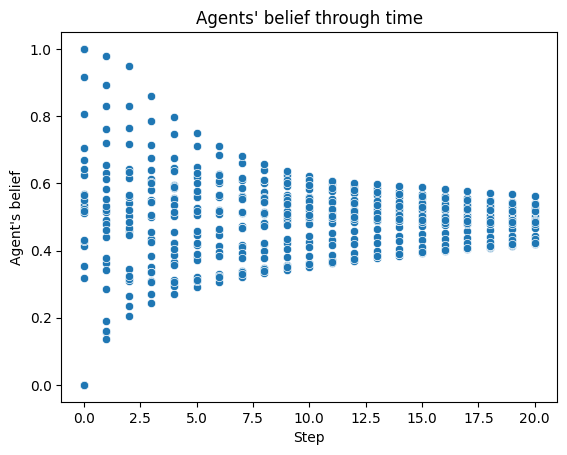

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from mesa import batch_run
import pandas as pd 
import seaborn as sns
#from mesa.batchrunner import batch_run


# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 20 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

params = {}

results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=1,
    max_steps=20,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,)

results_df = pd.DataFrame(results)
print(f"Column names in the dataframe: {results_df.columns.tolist()}")
results_df.head()

g = sns.scatterplot(data=results_df, x="Step", y="belief")
g.set(
    xlabel="Step",
    ylabel="Agent's belief",
    title="Agents' belief through time"
)

In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe() 
##print("Collected Data at Step {}: {}".format(step, agent_data))
print(agent_data.head())
agent_data
agent_data.to_excel(r"C:\Users\stijn\Downloads\Data export test.xlsx", index=True, engine = 'openpyxl')  # Set index to True if you want to include the index
#agent_data.to_csv('path_to_file.csv', index=True)  # Set index to True if you want to include the index


              FloodDamageEstimated  IsAdapted  FriendsCount    belief  \
Step AgentID                                                            
0    0                    0.760611      False             5  0.760611   
     1                    0.632351      False             4  0.632351   
     2                    0.744324      False             4  0.744324   
     3                    0.653915      False             6  0.653915   
     4                    0.748294      False             3  0.748294   

              Stubornness Friends  
Step AgentID                       
0    0                  4    None  
     1                  4    None  
     2                  4    None  
     3                  4    None  
     4                  4    None  


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data



,total_adapted_households
0,0
1,36
2,37
3,38
4,39
5,39
6,39
7,40
8,41
9,42
